## Identificación e imputación de valores perdidos en Python

Trabajamos con el conjunto de datos [Automobile](https://archive.ics.uci.edu/ml/datasets/automobile), que puedes encontrar en el repositorio UCI Machine Learning. Éste dataset contiene 205 instancias con diferentes características de automóviles como el número de puertas (number-of-doors), los caballos (horsepower) o el precio (price). Cargamos el dtaset y le asignamos el nombre de cada variable:

In [5]:
import pandas as pd

na_values = ["?"]

# Cargamos el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning'
                 '-databases/autos/imports-85.data', encoding = 'utf-8',na_values = na_values,
                 header = None)



# Añadimos el nombre de cada variable
df.columns = ["symboling", "normalized-losses", "make", "fuel-type", 
              "aspiration", "num-of-doors", "body-style", 
              "drive-wheels", "engine-location", "wheel-base", "length", 
              "width", "height", "curb-weight", "engine-type", 
              "num-of-cylinders", "engine-size", "fuel-system", "bore",
              "stroke", "compression-ratio", "horsepower", "peak-rpm", 
              "city-mpg", "highway-mpg", "price"]

In [2]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [8]:
df.tail(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
195,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,13415.0
196,-2,103.0,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,15985.0
197,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,16515.0
198,-2,103.0,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18420.0
199,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18950.0
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


Le pasamos una lista de valores que queremos considerar en todas las columnas como valores perdidos mediante el parámetro na_values

In [11]:
import pandas as pd

na_values = ["?"]

# Cargamos el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning'
                 '-databases/autos/imports-85.data', encoding = 'utf-8',
                 na_values = na_values, header = None)

# Añadimos el nombre de cada variable
df.columns = ["symboling", "normalized-losses", "make", "fuel-type", 
              "aspiration", "num-of-doors", "body-style", 
              "drive-wheels", "engine-location", "wheel-base", "length", 
              "width", "height", "curb-weight", "engine-type", 
              "num-of-cylinders", "engine-size", "fuel-system", "bore",
              "stroke", "compression-ratio", "horsepower", "peak-rpm", 
              "city-mpg", "highway-mpg", "price"]

In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Identificamos el número de missing values en cada columna del dataset

In [13]:
# Identificamos el número de missing values en cada columna
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Identificamos el número de missing values en cada columna de manera visual

<AxesSubplot:>

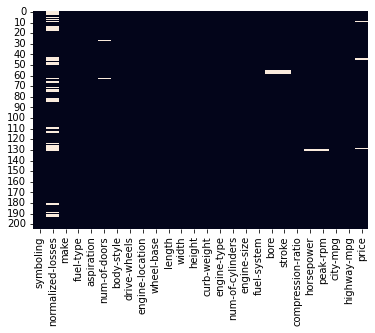

In [9]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(df.isnull(), cbar=False)

#### Eliminación de valores perdidos
Le definimos en qué columnas buscar los valores perdidos y para ello usamos el parámetro subset

In [10]:
# Eliminamos las filas con missing values en horsepower o peak-rpm
df.dropna(subset=['horsepower', 'peak-rpm'], inplace=True)

# Comprobamos que se han eliminado
print("valores perdidos en horsepower: " + 
      str(df['horsepower'].isnull().sum()))
print("valores perdidos en peak-rpm: " + 
      str(df['peak-rpm'].isnull().sum()))

valores perdidos en horsepower: 0
valores perdidos en peak-rpm: 0


#### Imputación con la media y moda
Para ello usamos la función fillna

In [11]:
# Imputamos la variable bore con la media
df['bore'].fillna(df['bore'].mean(), inplace=True)
print("valores perdidos en bore: " + 
      str(df['bore'].isnull().sum()))

# Imputamos la variable num-of-doors con la moda
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)
print("Valores perdidos en num-of-doors: " + 
      str(df['num-of-doors'].isnull().sum()))

valores perdidos en bore: 0
Valores perdidos en num-of-doors: 0


#### Imputación mediante modelo predictivo KNN
Usamos el modelo k-nearest neighbors, donde se estima el valor perdido como la media (en el caso de las variables numéricas) de los valores de los k vecinos u observaciones mas cercanos. Asimismo, para las variables categóricas, se utiliza las clase mayoritaria de entre los k mas cercanos.

In [13]:
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imputer.fit(df[["normalized-losses"]])
df["normalized-losses"] = imputer.transform(df[["normalized-losses"]]).ravel()

print("Valores perdidos en normalized-losses: " + 
      str(df['normalized-losses'].isnull().sum()))

Valores perdidos en normalized-losses: 0


In [8]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [14]:
import pivottablejs

ModuleNotFoundError: No module named 'pivottablejs'

In [15]:
!pip install pivottablejs

In [27]:
data = pd.read_csv("homicidios2.csv")

In [28]:
from pivottablejs import pivot_ui
pivot_ui(data)

In [25]:
len(data)

3403

In [29]:
data.info

<bound method DataFrame.info of         id Tipo_Muerte  Tipo   Provincia      Canton Area_Hecho  \
0     3689   SICARIATO     3    'EL ORO'  'EL GUABO'     URBANO   
1     4369   FEMICIDIO     1      GUAYAS   GUAYAQUIL     URBANO   
2     3980   FEMICIDIO     1      MANABI       QUITO     URBANO   
3     4180   FEMICIDIO     1      GUAYAS   GUAYAQUIL     URBANO   
4     4870   SICARIATO     3    'EL ORO'  'EL GUABO'     URBANO   
...    ...         ...   ...         ...         ...        ...   
3398  4426   FEMICIDIO     1      GUAYAS   GUAYAQUIL     URBANO   
3399   466   ASESINATO     0    'EL ORO'     MACHALA     URBANO   
3400  3092   HOMICIDIO     2   PICHINCHA       QUITO     URBANO   
3401  3772   SICARIATO     3    'EL ORO'  'EL GUABO'     URBANO   
3402   860   ASESINATO     0  ESMERALDAS    QUININDE     URBANO   

              Lugar Tipo_Lugar Fecha_Infraccion Hora_Infraccion  ...  \
0     'VIA PUBLICA'    PUBLICO        3/15/2022           14:30  ...   
1              CASA